<a href="https://colab.research.google.com/github/lakshitgosain/Tensorflow-ZTM/blob/main/TF_ZTM_01_Neural_Network_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Typical architecture of a regresison neural network

The word *typical* is on purpose.

Why?

Because there are many different ways (actually, there's almost an infinite number of ways) to write neural networks.

But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputing some kind of target number.

Yes, the previous sentence is vague but we'll see this in action shortly.

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

***Table 1:*** *Typical architecture of a regression network.* ***Source:*** *Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

Again, if you're new to neural networks and deep learning in general, much of the above table won't make sense. But don't worry, we'll be getting hands-on with all of it soon.

> 🔑 **Note:** A **hyperparameter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on its own (a value not explicitly set by an analyst).

Okay, enough talk, let's get started writing code.

To use TensorFlow, we'll import it as the common alias `tf` (short for TensorFlow).

In [ ]:

import tensorflow as tf
print(tf.__version__)

2.11.0


##Creating data to view and Fit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Create Features

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

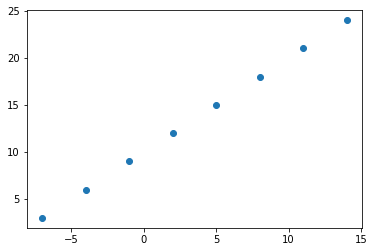

In [ ]:
plt.scatter(X,y);

In [ ]:
y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

###Input shapes


In [ ]:
#Create tensors for our housing price prediction problem
house_info=tf.constant(['bedroom','bathroom','garage'])
house_price=tf.constant([939700])
house_info.shape, house_price.shape

(TensorShape([3]), TensorShape([1]))

In [ ]:
input_shape=X.shape
output_shape=y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
#Turn our Numpy array into tenors
X=tf.constant(X)
y=tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

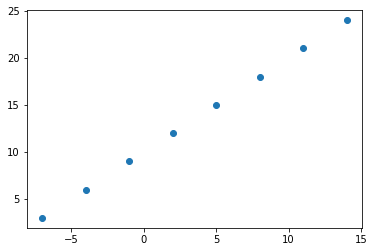

In [ ]:
plt.scatter(X,y)

## Steps in Modelling with Tensorflow

1. **Creating a model** - define the nput layer, output layer, as well as the hidden layers of a deep learning model
2. **Compiling a model**- define the loss function (in other words, the function which tells our model how to improve the patterns it's learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting the model-** letting the model try to find patterns between X & y (features and labels)

Get the data ready->build otr pick a pretraiuned model(to suit your problem) -> Fit the model to the data and make a prediction -> Evaluate the model -> Improve through experimentation -> save and reload your trained model.


In [ ]:
#another way of creating the layers.  
model=tf.keras.Sequential
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Dense(1))

TypeError: ignored

In [ ]:
#Creating the model using sequential APIs
tf.random.set_seed(42)

#1. Create a model using the sequentiual API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2.Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

#3. Fit the model
#model.fit(X,y,epochs=5)
#for tf version 2.7+, we need to use the below for fitting the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5);

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 21.2632 - mae: 21.2632
Epoch 2/5
1/1 [==============================] - 0s 25ms/step - loss: 20.8701 - mae: 20.8701
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 20.4974 - mae: 20.4974
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 20.2161 - mae: 20.2161
Epoch 5/5
1/1 [==============================] - 0s 14ms/step - loss: 19.9349 - mae: 19.9349


In [ ]:
#Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
#Try and make a predictio using a model
y_pred=model.predict([17.0])

1/1 [==============================] - 0s 182ms/step


In [ ]:
y_pred+16

array([[-6.40102]], dtype=float32)

### Improving our model
We can improve our model by altering the steps we used to create our model.

1. Creating a model -  here, we might add more layers, increase the number of hidden units within each of the hidden layers, change the activation function of the layer.

2. Compiling the model - here we might change the optimization function or perhaps the learning rate of the optimization function

3. Fitting the model - here we might fir a model for more epochs(leave it training for longer) or on more data (give the model more examples to learn from)

In [ ]:
#Create the bigger model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

#Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['mae'])

#Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)
#model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 13.4312 - mae: 13.4312
Epoch 2/100
1/1 [==============================] - 0s 60ms/step - loss: 13.3924 - mae: 13.3924
Epoch 3/100
1/1 [==============================] - 0s 39ms/step - loss: 13.3542 - mae: 13.3542
Epoch 4/100
1/1 [==============================] - 0s 42ms/step - loss: 13.3161 - mae: 13.3161
Epoch 5/100
1/1 [==============================] - 0s 34ms/step - loss: 13.2785 - mae: 13.2785
Epoch 6/100
1/1 [==============================] - 0s 45ms/step - loss: 13.2407 - mae: 13.2407
Epoch 7/100
1/1 [==============================] - 0s 24ms/step - loss: 13.2026 - mae: 13.2026
Epoch 8/100
1/1 [==============================] - 0s 36ms/step - loss: 13.1646 - mae: 13.1646
Epoch 9/100
1/1 [==============================] - 0s 24ms/step - loss: 13.1268 - mae: 13.1268
Epoch 10/100
1/1 [==============================] - 0s 26ms/step - loss: 13.0889 - mae: 13.0889
Epoch 11/100
1/1 [==============================] -

In [ ]:
model.predict([17.0])

1/1 [==============================] - 1s 872ms/step


array([[11.689178]], dtype=float32)

### Another attempt

In [ ]:
#Create the bigger model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

#Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mae'])

#Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)
#model.fit(X,y,epochs=100)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 13.5983 - mae: 13.5983
Epoch 2/100
1/1 [==============================] - 0s 24ms/step - loss: 13.1843 - mae: 13.1843
Epoch 3/100
1/1 [==============================] - 0s 55ms/step - loss: 12.7869 - mae: 12.7869
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 12.4364 - mae: 12.4364
Epoch 5/100
1/1 [==============================] - 0s 41ms/step - loss: 12.1172 - mae: 12.1172
Epoch 6/100
1/1 [==============================] - 0s 19ms/step - loss: 11.8059 - mae: 11.8059
Epoch 7/100
1/1 [==============================] - 0s 18ms/step - loss: 11.4799 - mae: 11.4799
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 11.1622 - mae: 11.1622
Epoch 9/100
1/1 [==============================] - 0s 34ms/step - loss: 10.9035 - mae: 10.9035
Epoch 10/100
1/1 [==============================] - 0s 23ms/step - loss: 10.6730 - mae: 10.6730
Epoch 11/100
1/1 [==============================] -

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 197ms/step


array([[31.51409]], dtype=float32)

### Another attempt to improve the model

In [ ]:
#Create the bigger model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])

#Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['mae'])

#Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=300)
#model.fit(X,y,epochs=100)

Epoch 1/300
1/1 [==============================] - 5s 5s/step - loss: 13.1318 - mae: 13.1318
Epoch 2/300
1/1 [==============================] - 0s 21ms/step - loss: 13.0847 - mae: 13.0847
Epoch 3/300
1/1 [==============================] - 0s 29ms/step - loss: 13.0386 - mae: 13.0386
Epoch 4/300
1/1 [==============================] - 0s 13ms/step - loss: 12.9926 - mae: 12.9926
Epoch 5/300
1/1 [==============================] - 0s 15ms/step - loss: 12.9465 - mae: 12.9465
Epoch 6/300
1/1 [==============================] - 0s 22ms/step - loss: 12.8995 - mae: 12.8995
Epoch 7/300
1/1 [==============================] - 0s 26ms/step - loss: 12.8521 - mae: 12.8521
Epoch 8/300
1/1 [==============================] - 0s 28ms/step - loss: 12.8046 - mae: 12.8046
Epoch 9/300
1/1 [==============================] - 0s 17ms/step - loss: 12.7569 - mae: 12.7569
Epoch 10/300
1/1 [==============================] - 0s 18ms/step - loss: 12.7090 - mae: 12.7090
Epoch 11/300
1/1 [==============================] -

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 88ms/step


array([[32.006405]], dtype=float32)

## Evaluating our Model

When it comes to evaluating the model, there are 3 words...Visualize,Visualize,Visualize

It's good idea to Visualize:
1. The data - what data are we working with? what does it look like?
2. The model itself- What dos our model look like
3. The training of the model - How does a moedl perform while it learns
4. the prediction of the model- how do the predictions of the model line up with the ground truth



In [ ]:
X=tf.range(-100,100,4)
X
y=X+10
X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

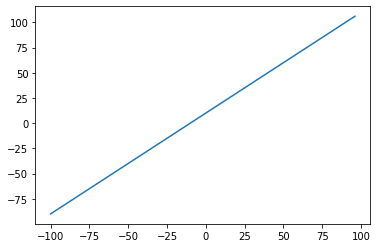

In [ ]:
#Visualize th data
import matplotlib.pyplot as plt
plt.plot(X,y);

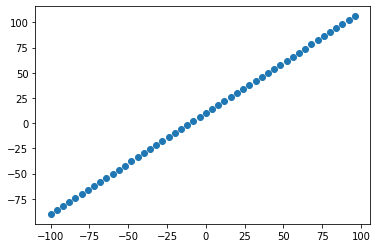

In [ ]:
plt.scatter(X,y);

### the 3 sets...train, test and validation



In [ ]:
#Check the length of how many samples we have
len(X)


50

In [ ]:
#Split the data into train and test sets
X_train=X[:40]
X_test=X[40:]
y_train=y[:40]
y_test=y[40:]

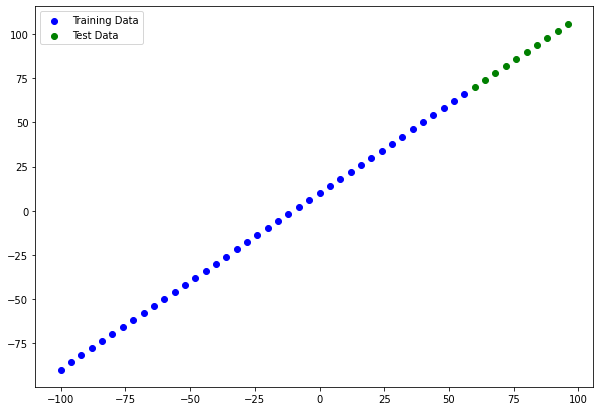

In [ ]:
#Visualize training and test sets
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train, c='b', label='Training Data')
plt.scatter(X_test,y_test,c='g',label='Test Data')
plt.legend()
plt.show();

In [ ]:
#Let's have a look at how to build a neural network for the problem

#1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#Comile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])


#model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=5)

In [ ]:
model.summary()

ValueError: ignored

In [ ]:
#Let's create a model that builds automatically by defining the input_shape in the firt layer
tf.random.set_seed(42)
model=tf.keras.Sequential([tf.keras.layers.Dense(1,input_shape=[1])])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### 
* Total Params - total number of parameters in the model
* Trainable params- these are the parameters (patterns) model can update as it learns
* Non-trainiable params- there are the parameters that are not updated while training(this is typically when you bring in already learnt patterns or parameters from other models during transfer learning)

Look for what are the trainable parameters. Check out MIT's intro to deep learning video

Try to play around with the no. of units of neural networks and see how it affects the no. of parameters

In [ ]:
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=10,verbose=0)

In [ ]:
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=10,verbose=1)

Epoch 1/10
2/2 [==============================] - 0s 9ms/step - loss: 11.9929 - mae: 11.9929
Epoch 2/10
2/2 [==============================] - 0s 7ms/step - loss: 13.0891 - mae: 13.0891
Epoch 3/10
2/2 [==============================] - 0s 12ms/step - loss: 11.7530 - mae: 11.7530
Epoch 4/10
2/2 [==============================] - 0s 7ms/step - loss: 9.1913 - mae: 9.1913
Epoch 5/10
2/2 [==============================] - 0s 7ms/step - loss: 10.0572 - mae: 10.0572
Epoch 6/10
2/2 [==============================] - 0s 8ms/step - loss: 9.3223 - mae: 9.3223
Epoch 7/10
2/2 [==============================] - 0s 9ms/step - loss: 8.4703 - mae: 8.4703
Epoch 8/10
2/2 [==============================] - 0s 11ms/step - loss: 8.9679 - mae: 8.9679
Epoch 9/10
2/2 [==============================] - 0s 9ms/step - loss: 18.6339 - mae: 18.6339
Epoch 10/10
2/2 [==============================] - 0s 9ms/step - loss: 9.9983 - mae: 9.9983


In [ ]:
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=10,verbose=2)

Epoch 1/10
2/2 - 0s - loss: 9.0651 - mae: 9.0651 - 12ms/epoch - 6ms/step
Epoch 2/10
2/2 - 0s - loss: 9.5346 - mae: 9.5346 - 11ms/epoch - 5ms/step
Epoch 3/10
2/2 - 0s - loss: 10.7249 - mae: 10.7249 - 11ms/epoch - 5ms/step
Epoch 4/10
2/2 - 0s - loss: 9.2616 - mae: 9.2616 - 10ms/epoch - 5ms/step
Epoch 5/10
2/2 - 0s - loss: 10.1578 - mae: 10.1578 - 10ms/epoch - 5ms/step
Epoch 6/10
2/2 - 0s - loss: 9.3954 - mae: 9.3954 - 12ms/epoch - 6ms/step
Epoch 7/10
2/2 - 0s - loss: 8.5175 - mae: 8.5175 - 11ms/epoch - 6ms/step
Epoch 8/10
2/2 - 0s - loss: 8.8753 - mae: 8.8753 - 9ms/epoch - 5ms/step
Epoch 9/10
2/2 - 0s - loss: 18.9412 - mae: 18.9412 - 9ms/epoch - 5ms/step
Epoch 10/10
2/2 - 0s - loss: 10.0972 - mae: 10.0972 - 10ms/epoch - 5ms/step


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import plot_model

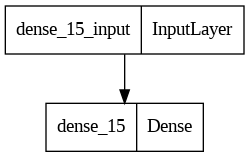

In [ ]:
plot_model(model)

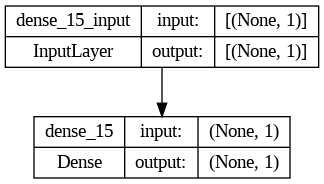

In [ ]:
plot_model(model,show_shapes=True)

In [ ]:
#Let's create a model that builds automatically by defining the input_shape in the firt layer
tf.random.set_seed(42)
model=tf.keras.Sequential([tf.keras.layers.Dense(10,input_shape=[1],name='input_layer'),
                          tf.keras.layers.Dense(1,name='output_layer')],
                          name="Model_test")

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae']
              )

In [ ]:
model.summary()

Model: "Model_test"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


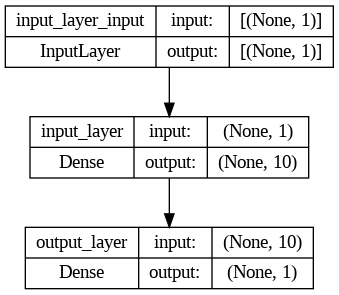

In [ ]:
plot_model(model,show_shapes=True)

In [ ]:
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 46.9186 - mae: 46.9186
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 27.1256 - mae: 27.1256
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 17.1847 - mae: 17.1847
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 14.3970 - mae: 14.3970
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 16.3860 - mae: 16.3860
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1392 - mae: 11.1392
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.1434 - mae: 12.1434
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 10.8880 - mae: 10.8880
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 37.8692 - mae: 37.8692
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 25.4776 - mae: 25.4776
Epoch 11/100
2/2 [==============================] - 0s 6ms

### Visulizing our Model's Predictions

TO visualize predictions, it's a good idea to plot them again the ground truth

Oftern we'll see this in the form of y_test or y_true versus y_pred

In [ ]:
y_pred=model.predict(X_test)

1/1 [==============================] - 0s 88ms/step


In [ ]:
y_pred

array([[ 76.876396],
       [ 81.889336],
       [ 86.90229 ],
       [ 91.915245],
       [ 96.9282  ],
       [101.94116 ],
       [106.954124],
       [111.96708 ],
       [116.98001 ],
       [121.992966]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
#Let's create a plotting functions
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """Plots training data, test data and compares the predictions to the ground truth"""

  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels, c='b', label= 'train_data')
  plt.scatter(test_data, test_labels, c='g',label='test data')
  plt.scatter(test_data,predictions,c='r',label='predictions')
  plt.legend();

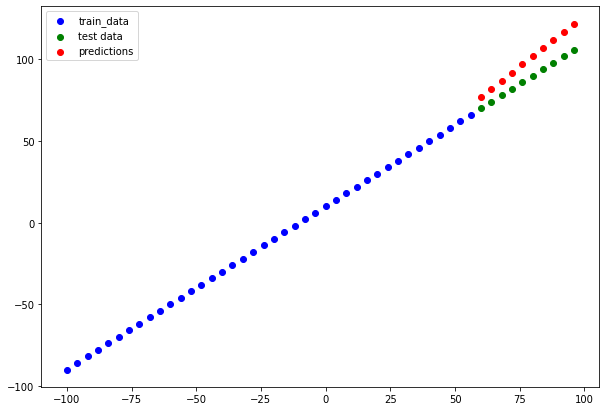

In [ ]:
plot_predictions(X_train,y_train,X_test,y_test,y_pred)

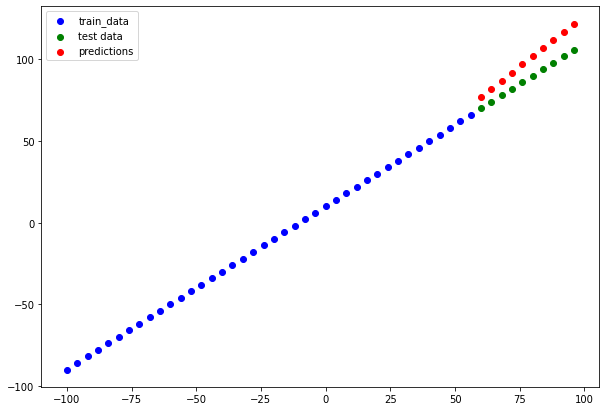

In [ ]:
plot_predictions()

### Evaluating our models predictions with Evaluation Metrics
Depending on the problem we are working on, there would be different evaluation metrics to evaluate the model's performance

Since we are working with Regression, the two main metics are:
* MAE: Mean absolute error, "On average, how wrong is each of my model's prediction - As a great starter metric for any regression problem
* MSE: Mean squared Error: " Square the Average errors" - When larger errors are more significant than smaller errors

* Huber- Comination of MSE and MAE. Less sensitive to outliers than MSE

In [ ]:
#Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 190ms/step - loss: 11.4347 - mae: 11.4347


[11.434683799743652, 11.434683799743652]

In [ ]:
y_pred

array([[ 76.876396],
       [ 81.889336],
       [ 86.90229 ],
       [ 91.915245],
       [ 96.9282  ],
       [101.94116 ],
       [106.954124],
       [111.96708 ],
       [116.98001 ],
       [121.992966]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
#Calcualte the Mean Absolute error
mae=tf.metrics.mean_absolute_error(y_test,y_pred)

In [ ]:
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.0741625, 10.844266 , 10.       , 10.383049 , 11.97128  ,
       14.764697 , 18.954124 , 23.96708  , 28.980011 , 33.992966 ],
      dtype=float32)>

### When we are making an Evaluation Metric, the dimension of the y_test and Y-pred must be in the same shape


In [ ]:
mae=tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))
mae
#We got the mae now as expected.

<tf.Tensor: shape=(), dtype=float32, numpy=11.434681>

In [ ]:
#Calculate Mean Squared Error
mse=tf.metrics.mean_squared_error(y_test,y_pred)

In [ ]:
mse

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 255.73457,  169.34021,  133.20496,  147.32913,  211.71274,
        326.35602,  491.25885,  706.42084,  971.841  , 1287.5217 ],
      dtype=float32)>

In [ ]:
#We need to reshape
tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=139.21706>

In [ ]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true,y_pred)

def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_test,y_pred)

### Running Experiments to improve our model

Build-> fit it-> evaluate it -> tweak it -> fit it ->evalute it.....

1. Get more data- Get more examples for your model to train on (more oppertunities to learn patterns or relationshsips between failures and labels)
2. Make your model larger (using a more complecx mpdel, in the form of more layers or hiden units in each layer)
3. Train for longer - give your model more of a chance to find patterns in the data

Let's do 3 modelling experiments

1. model_1 : Same as the original Model, 1 layers, trained for 100 epochs
2. model_2: 2 layers, trained for 100 epochs
3. model_3: 2 layers, trained for 500 epochs
4. model_4:
5.


**Build model_1**

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [ ]:
#set random seed
tf.random.set_seed(42)

#1. Create the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

#3. Fit the model
model_1.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 28ms/step - loss: 28.5182 - mae: 28.5182
Epoch 2/100
2/2 [==============================] - 0s 15ms/step - loss: 8.7797 - mae: 8.7797
Epoch 3/100
2/2 [==============================] - 0s 24ms/step - loss: 11.1806 - mae: 11.1806
Epoch 4/100
2/2 [==============================] - 0s 17ms/step - loss: 9.5743 - mae: 9.5743
Epoch 5/100
2/2 [==============================] - 0s 16ms/step - loss: 10.4842 - mae: 10.4842
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 9.7093 - mae: 9.7093
Epoch 7/100
2/2 [==============================] - 0s 15ms/step - loss: 8.8040 - mae: 8.8040
Epoch 8/100
2/2 [==============================] - 0s 12ms/step - loss: 9.0671 - mae: 9.0671
Epoch 9/100
2/2 [==============================] - 0s 14ms/step - loss: 19.3303 - mae: 19.3303
Epoch 10/100
2/2 [==============================] - 0s 23ms/step - loss: 10.4385 - mae: 10.4385
Epoch 11/100
2/2 [==============================] - 0s 13ms

1/1 [==============================] - 0s 105ms/step


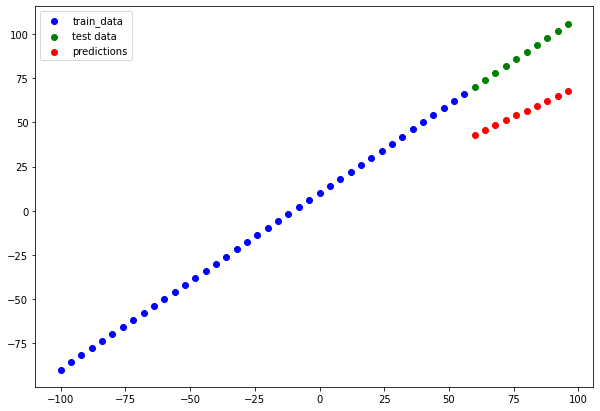

In [ ]:
#Make and plot predictions for model_1
y_preds_1=model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
#Create model_1 evaluation metrics
mae_1=mae(y_test, tf.squeeze(y_preds_1))
mse_1=mse(y_test,tf.squeeze(y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=32.67763>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1080.3032>)

In [ ]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true,tf.squeeze(y_pred))

def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_test,tf.squeeze(y_pred))

**Build Model_2**

In [ ]:
tf.random.set_seed(42)

model_2= tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mse'])

model_2.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 22.6865 - mse: 895.5721
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 22.2414 - mse: 651.4475
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 27.9716 - mse: 1177.1553
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 12.5513 - mse: 227.4973
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 15.4695 - mse: 308.1695
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 12.2744 - mse: 189.2121
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.5638 - mse: 163.4482
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2280 - mse: 180.7206
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 42.2695 - mse: 2858.3616
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 29.4356 - mse: 1226.5159
Epoch 11/100
2/2 [==========================

1/1 [==============================] - 0s 39ms/step


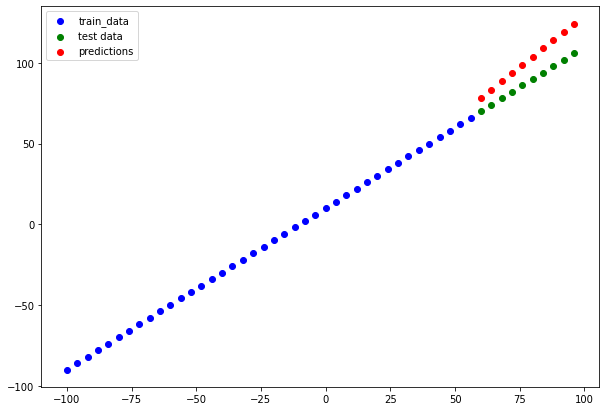

In [ ]:
y_preds_2=model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
#Calculate model_2 eval metrics
mae_2=mae(y_test, y_preds_2)
mse_2=mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.380246>,
 <tf.Tensor: shape=(), dtype=float32, numpy=189.14493>)

In [ ]:
tf.random.set_seed(42)

model_3= tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mse'])

model_3.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 19ms/step - loss: 33.2081 - mse: 1600.4423
Epoch 2/500
2/2 [==============================] - 0s 10ms/step - loss: 21.2566 - mse: 583.8040
Epoch 3/500
2/2 [==============================] - 0s 11ms/step - loss: 27.5616 - mse: 1123.4866
Epoch 4/500
2/2 [==============================] - 0s 12ms/step - loss: 26.5450 - mse: 1035.7629
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 14.5293 - mse: 261.4435
Epoch 6/500
2/2 [==============================] - 0s 11ms/step - loss: 11.5711 - mse: 154.8559
Epoch 7/500
2/2 [==============================] - 0s 12ms/step - loss: 10.9182 - mse: 144.2223
Epoch 8/500
2/2 [==============================] - 0s 11ms/step - loss: 10.9829 - mse: 147.8693
Epoch 9/500
2/2 [==============================] - 0s 19ms/step - loss: 39.2407 - mse: 2407.1482
Epoch 10/500
2/2 [==============================] - 0s 11ms/step - loss: 26.7916 - mse: 1009.3920
Epoch 11/500
2/2 [================

1/1 [==============================] - 0s 144ms/step


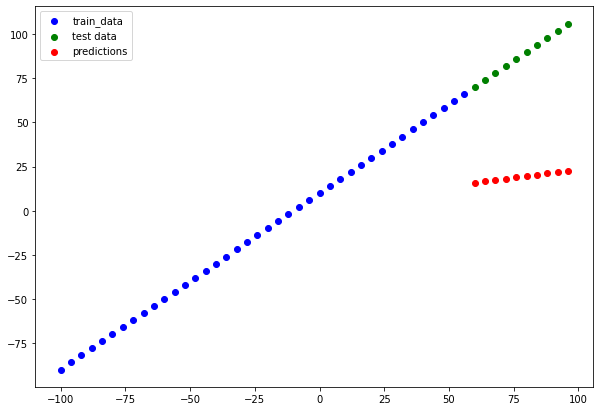

In [ ]:
y_preds_3=model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
#Calculate model_2 eval metrics
mae_3=mae(y_test, y_preds_3)
mse_3=mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.70654>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4806.99>)

## Comparing the results of our experiments

In [ ]:
#Let's compare our models preforance using a pandas dataframe
import pandas as pd

model_results=[["model_1",mae_1.numpy(),mse_1.numpy()],
               ["model_2",mae_2.numpy(),mse_2.numpy()],
               ["model_3",mae_3.numpy(),mse_3.numpy()]]

all_results=pd.DataFrame(model_results, columns=['model_number', 'mae', 'mse'])

In [ ]:
all_results

,model_number,mae,mse
0,model_1,32.677631,1080.303223
1,model_2,13.380246,189.144928
2,model_3,68.706543,4806.990234


In [ ]:
model_2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 10)                20        
                                                                 
 dense_26 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


looks like model 2 preforms the best

One of our main goals is to minimize the time between experiments. The more experiments you do, the more things you'll figure out that does'nt work.

## Tracking your experiments 

One really good habit in machine learning modelling is to track the reults of your experiments. It can be tedious if you are running lot;s of experiments. Luckily there are tools to help us.

Resoure: One of the tools is Tensorflow's TensoBoard. It helps track modelling experiments. 

Weights and Biases - Plugs straight into tensorboard. It helps in tracking the ML Models.

## Save our models

Helps us use the model in a Mobile app or somewhere else

There are 2 main ways/types of saving the model
1. SavedModel Format
2. HDF5 Format


In [ ]:
#save the model using the savedModel Format
model_2.save("File_name")

#Save model using the hdf5 format
model_2.save('file_name.h5')

## Loading in a Saved Model


In [ ]:
## Loading in a SavedModel format

loaded_savedModel_format=tf.keras.models.load_model('./File_name') #For colab, copy the path of the Model Saved file

loaded_savedModel_format.summary()

In [ ]:
#Load the model with h5 format
loaded_h5_model=tf.keras.models.load_model('file_name.h5')

In [ ]:
loaded_h5_model.summary()